## Observations and Insights

In [ ]:
# 1. After analyzing the data of the four drugs, it appears that two drugs, Capomulin and Ramicane, have a lower median 
#tumor volume which could indicate they out perform Infubinol and Ceftamine.

# 2. Mouse b128's tumor volume started getting smaller after timepoint 25. This mouse was treated with Capomulin 
#It would be necessary to treat another mouse with that drug to know if the effect will be repeated or that result 
#was extraordinary.

# 3. In the treatment with the drug Capomulin the average weight and average tumor volume are strongly correlated.


## Dependencies and starter code

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy as sp
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [45]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [46]:
# Combine the data into a single dataset

combined_data=pd.merge(mouse_metadata,study_results,how="left",on="Mouse ID")
combined_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mice = combined_data["Mouse ID"].unique()
drugs = combined_data["Drug Regimen"].unique()
time = combined_data["Timepoint"].unique()

num_mouse = len(mice)
num_drugs = len(drugs)
num_measurements = len(time)
num_samples = num_drugs * num_measurements

data_summary = pd.DataFrame({"Number of Mice": [num_mouse],
                         "Number of Drug Regimen Treatments": [num_drugs],
                         "Number of Time Measurements": [num_measurements],
                         "Number of Samples": [num_samples]})
data_summary

,Number of Mice,Number of Drug Regimen Treatments,Number of Time Measurements,Number of Samples
0,249,10,10,100


In [50]:
mean_volume = pd.DataFrame(round(combined_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'],2))
mean_volume = mean_volume.rename(columns={"Tumor Volume (mm3)":"Mean"})

median_volume = pd.DataFrame(round(combined_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'],2))
median_volume = median_volume.rename(columns={"Tumor Volume (mm3)":"Median"})

variance = pd.DataFrame(round(combined_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'],2))
variance = variance.rename(columns={"Tumor Volume (mm3)":"Variance"})

stdev = pd.DataFrame(round(combined_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'],2))
stdev = stdev.rename(columns={"Tumor Volume (mm3)":"StDev"})

SEM = pd.DataFrame(round(combined_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'],2))
SEM = SEM.rename(columns={"Tumor Volume (mm3)":"SEM"})

summary_stat = [mean_volume, median_volume, variance, stdev, SEM]
summary_stat = pd.concat(summary_stat,axis=1,join='inner')
summary_stat

,Mean,Median,Variance,StDev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [51]:
stat_analysis= pd.DataFrame(round(combined_data.groupby(['Drug Regimen']).describe()['Tumor Volume (mm3)'],2))

stat_analysis

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.68,4.99,23.34,37.69,41.56,45.00,48.16
Ceftamin,178.0,52.59,6.27,45.00,47.21,51.78,56.80,68.92
Infubinol,178.0,52.88,6.57,36.32,47.31,51.82,57.31,72.23
Ketapril,188.0,55.24,8.28,45.00,48.23,53.70,60.87,78.57
Naftisol,186.0,54.33,8.13,45.00,47.29,52.51,59.96,76.67
Placebo,181.0,54.03,7.82,45.00,47.46,52.29,59.92,73.21
Propriva,161.0,52.32,6.51,45.00,47.08,50.85,56.18,72.46
Ramicane,228.0,40.22,4.85,22.05,36.67,40.67,45.00,47.62
Stelasyn,181.0,54.23,7.71,45.00,48.05,52.43,58.72,75.12


## Bar plots

Text(0, 0.5, 'Tumor Volume (mm3)')

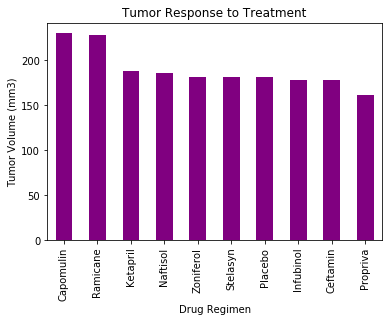

In [52]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

treatment_reg = combined_data["Drug Regimen"].value_counts()
treatment_bar_graph = treatment_reg.plot(kind="bar", facecolor="purple")

plt.title('Tumor Response to Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

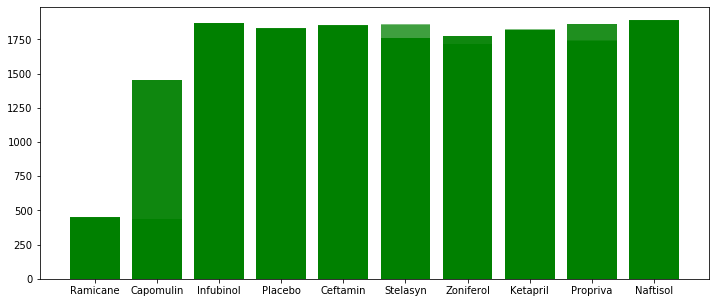

In [53]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(combined_data))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(12,5))
plt.bar(combined_data["Drug Regimen"], x_axis, color='g', alpha=0.5, align="center")
plt.show()

## Pie plots

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_count = pd.DataFrame(combined_data["Sex"].value_counts())
gender_count

,Sex
Male,958
Female,935


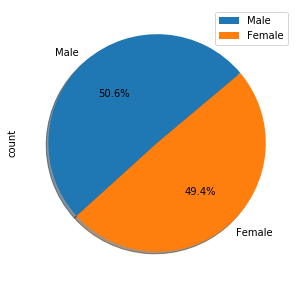

In [55]:
gender_df = pd.DataFrame({'count':[958, 935]},
                   index = ['Male', 'Female'])
gender_pie = gender_df.plot.pie(y='count', figsize=(5, 5),autopct="%1.1f%%", shadow=True, startangle=40)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


([<matplotlib.patches.Wedge at 0x212360ba8c8>,
 [Text(-0.6197235015792526, 1.027590765621388, 'Male'),
  Text(0.5680798764476486, -0.9419582018196055, 'Female')],
 [Text(-0.3615053759212306, 0.5994279466124762, '50.6%'),
  Text(0.30986175078962647, -0.5137953828106938, '49.4%')])

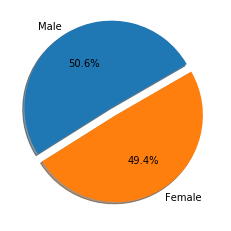

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = pd.DataFrame(combined_data["Sex"].value_counts())
labels = ["Male", "Female"]
explode = (0.1,0)
plt.pie(gender_count, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=30)

## Quartiles, outliers and boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

#Capomulin

trmt_capomulin = ["Capomulin"]
combined_data['Drug Regimen'].isin(trmt_capomulin)
trmt_capo_df= combined_data[combined_data['Drug Regimen'].isin(trmt_capomulin)]
                          
#Some mice did not have the same amount of measurements as others, use max timepoint & associated tumor volume

capo_tumor_volume = trmt_capo_df.loc[trmt_capo_df.groupby(["Mouse ID"])["Timepoint"].idxmax()]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = capo_tumor_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {round(quartiles[0.5],2)} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")




The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.


In [29]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

#Ramicane

trmt_ramicane = ["Ramicane"]
combined_data['Drug Regimen'].isin(trmt_ramicane)
trmt_rami_df= combined_data[combined_data['Drug Regimen'].isin(trmt_ramicane)]
                          
#Some mice did not have the same amount of measurements as others, use max timepoint & associated tumor volume

rami_tumor_volume = trmt_rami_df.loc[trmt_rami_df.groupby(["Mouse ID"])["Timepoint"].idxmax()]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = rami_tumor_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {round(quartiles[0.5],2)} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


In [58]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

#Infubinol

trmt_infubinol = ["Infubinol"]
combined_data['Drug Regimen'].isin(trmt_infubinol)
trmt_infu_df= combined_data[combined_data['Drug Regimen'].isin(trmt_infubinol)]
                          
#Some mice did not have the same amount of measurements as others, use max timepoint & associated tumor volume

infu_tumor_volume = trmt_infu_df.loc[trmt_infu_df.groupby(["Mouse ID"])["Timepoint"].idxmax()]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = infu_tumor_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {round(quartiles[0.5],2)} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.17 
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.


In [33]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

#Ceftamin

trmt_ceftamin = ["Ceftamin"]
combined_data['Drug Regimen'].isin(trmt_ceftamin)
trmt_ceft_df= combined_data[combined_data['Drug Regimen'].isin(trmt_ceftamin)]
                          
#Some mice did not have the same amount of measurements as others, use max timepoint & associated tumor volume

ceft_tumor_volume = trmt_ceft_df.loc[trmt_ceft_df.groupby(["Mouse ID"])["Timepoint"].idxmax()]

# Calculate the IQR and quantitatively determine if there are any potential outliers.

quartiles = ceft_tumor_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {round(quartiles[0.5],2)} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The interquartile range of Ceftamin is: 15.58
The the median of Ceftamin is: 59.85 
Values below 25.35 could be outliers.
Values above 87.67 could be outliers.


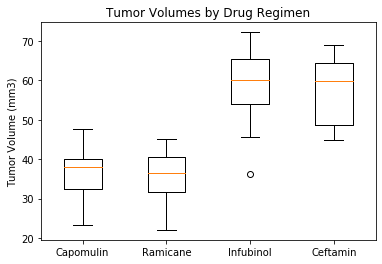

In [59]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#create dataframe with 4 drugs

capo_volume = capo_tumor_volume['Tumor Volume (mm3)']
rami_volume = rami_tumor_volume['Tumor Volume (mm3)']
infu_volume = infu_tumor_volume['Tumor Volume (mm3)']
ceft_volume = ceft_tumor_volume['Tumor Volume (mm3)']
volumes = [capo_volume, rami_volume, infu_volume, ceft_volume]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(volumes)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])
plt.show()

## Line and scatter plots

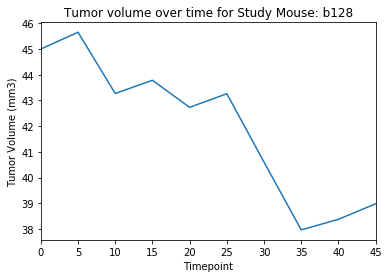

<Figure size 432x288 with 0 Axes>

In [60]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

mouse_id = ["b128"]
combined_data['Mouse ID'].isin(mouse_id)
one_mouse= combined_data[combined_data['Mouse ID'].isin(mouse_id)]

#create new dataframe with only columns of interest
one_mouse_df= one_mouse[['Timepoint','Tumor Volume (mm3)']]
one_mouse_df = one_mouse_df.set_index('Timepoint')

#line graph
one_mouse_df['Tumor Volume (mm3)'].plot(kind="line")

# Set a title for the chart
plt.title("Tumor volume over time for Study Mouse: b128")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(rotation=0)

plt.show()
plt.tight_layout()

The r-squared is: 0.8418558779004007


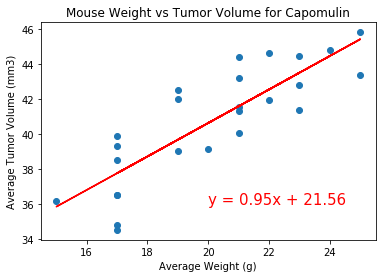

In [61]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouse_capo_grouped = trmt_capo_df.groupby('Mouse ID')

#Calculate Tumor Volume mean

capo_tumor_mean = round((mouse_capo_grouped["Tumor Volume (mm3)"]).mean(),2)

#Calculate Tumor Volume mean
capo_weight_mean = (mouse_capo_grouped["Weight (g)"]).mean()

# Creating a new DataFrame for scatter plt
capo_scatter_table = pd.DataFrame({"Average Weight": capo_weight_mean,"Average Tumor Volume": capo_tumor_mean})

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Create scatter plot
x_values = capo_scatter_table['Average Weight']
y_values = capo_scatter_table['Average Tumor Volume']
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Tumor Volume for Capomulin')
print(f"The r-squared is: {rvalue}")

plt.show()